# GPT4-omni VLM

In this notebook we will use the vision language model GPT4 Omni to inspect two images.

In [1]:
import openai
from skimage.io import imread
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb

## Example image
First we load a medical tomography image.

We will now send the image to ChatGPT and ask it the same questions.

In [2]:
def prompt_chatGPT(prompt:str, image, model="gpt-4o"):
    """A prompt helper function that sends a message to openAI
    and returns only the text response.
    """
    rgb_image = _img_to_rgb(image)
    byte_stream = numpy_to_bytestream(rgb_image)
    base64_image = base64.b64encode(byte_stream).decode('utf-8')

    message = [{"role": "user", "content": [
        {"type": "text", "text": prompt},
        {
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
        }
    }]}]
            
    # setup connection to the LLM
    client = openai.OpenAI()
    
    # submit prompt
    response = client.chat.completions.create(
        model=model,
        messages=message
    )
    
    # extract answer
    return response.choices[0].message.content

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 5, ..., 6, 3, 3],
                  ...,
                  [0, 0, 0, ..., 3, 2, 3],
                  [0, 0, 0, ..., 1, 4, 9],
                  [0, 0, 0, ..., 1, 4, 8]], dtype=uint8)
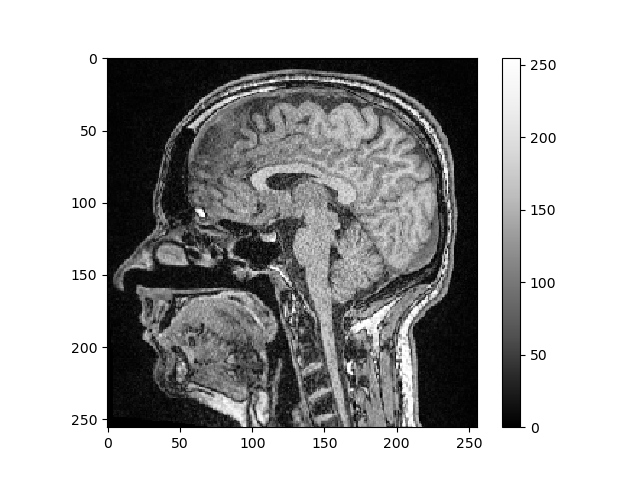
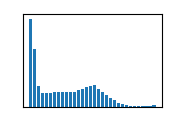

In [3]:
mri = imread("data/Haase_MRT_tfl3d1.tif")[100]
stackview.insight(mri)

In [4]:
prompt_chatGPT("what's in this image?", mri, model="gpt-4o")

'This image appears to be a sagittal MRI scan of a human head, focusing on the brain. In the image, you can see various structures of the brain, such as the cerebrum, cerebellum, brainstem, and other anatomical features. The detail in the image indicates the different tissues and structures within the brain.'

## Exercise
Use a vision-language model to determine the content of an image, e.g. `membrane2d.tif`. Ask the model to differentiate these cases:
* An image with bright blob-like structures
* An image with membrane-like structures such as lines or meshes

Make sure the model response with the case only and no detailed explanation.